In [1]:
# importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [2]:
# importing the dataset
dataset = pd.read_csv('cars.csv')

X = dataset[dataset.columns[:-1]]  # to take all rows but not tha last column of the dataset

X = X.convert_objects(convert_numeric=True)  # To convert all data values of the dataset to numeric
print(X.mean())

mpg               23.144828
 cylinders         5.590038
 cubicinches     200.918919
 hp              106.360153
 weightlbs      3009.833333
 time-to-60       15.547893
 year           1976.819923
dtype: float64


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [3]:
# Eliminating null values
for i in X.columns:
    X[i]=X[i].fillna(int(X[i].mean()))                   # Filling data inside any missing data with the mean of all the values of that column

print(X)

      mpg   cylinders   cubicinches   hp   weightlbs   time-to-60   year
0    14.0           8         350.0  165      4209.0           12   1972
1    31.9           4          89.0   71      1925.0           14   1980
2    17.0           8         302.0  140      3449.0           11   1971
3    15.0           8         400.0  150      3761.0           10   1971
4    30.5           4          98.0   63      2051.0           17   1978
5    23.0           8         350.0  125      3900.0           17   1980
6    13.0           8         351.0  158      4363.0           13   1974
7    14.0           8         440.0  215      4312.0            9   1971
8    25.4           5         183.0   77      3530.0           20   1980
9    37.7           4          89.0   62      2050.0           17   1982
10   34.0           4         108.0   70      2245.0           17   1983
11   34.3           4          97.0   78      2188.0           16   1981
12   16.0           8         302.0  140      4141.

In [4]:
# Eliminating null values

for i in X.columns:
    print(X[i].isnull().sum())


0
0
0
0
0
0
0


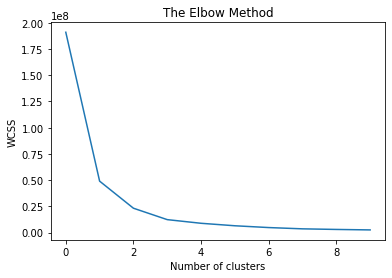

In [8]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(0, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


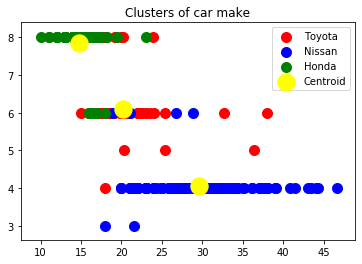

In [9]:
# Applying k-means to the car dataset

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
X = X.as_matrix(columns=None)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Toyota')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Nissan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Honda')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')
plt.title('Clusters of car make')
plt.legend()
plt.show()
